In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
sentences = []
for filename in os.listdir('data/aclImdb/train/pos'):
    with open(os.path.join('data/aclImdb/train/pos', filename)) as f:
        sentences.append(f.readlines())

In [57]:
sw = set(stopwords.words('english'))
len_sentences = map( lambda x: len([w for w in nltk.word_tokenize(x[0]) if w not in sw]), sentences)

(array([2056., 3433., 1860., 1196.,  873.,  601.,  436.,  324.,  272.,
         199.]),
 array([ 46. ,  89.5, 133. , 176.5, 220. , 263.5, 307. , 350.5, 394. ,
        437.5, 481. ]),
 <BarContainer object of 10 artists>)

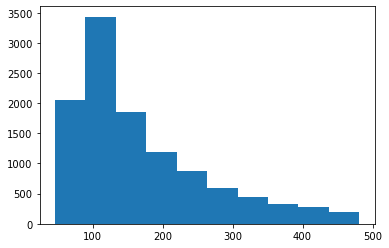

In [58]:
n = len(sentences)
plt.hist(sorted(list(len_sentences))[int(0.05*n):int(0.95*n)])

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gpufs/users/students/iasd22/iasd22_0899/nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
nltk.word_tokenize(sentences[0][0])

['The',
 'Hanson',
 'brothers',
 '-',
 'Andy',
 '(',
 'apparently',
 'has',
 'his',
 'act',
 'together',
 ')',
 'and',
 'Hank',
 '(',
 'clearly',
 'does',
 "n't",
 'have',
 'his',
 'act',
 'together',
 ')',
 'need',
 'money',
 '.',
 'Andy',
 'comes',
 'up',
 'with',
 'a',
 'scheme',
 'to',
 'get',
 'some',
 'dough',
 'that',
 'will',
 'have',
 'consequences',
 'for',
 'the',
 'whole',
 'Hanson',
 'family.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'This',
 'film',
 'delivers',
 '.',
 'This',
 'is',
 'a',
 'layered',
 ',',
 'full-blooded',
 'roller',
 'coaster',
 'ride',
 'that',
 'knows',
 'exactly',
 'what',
 'it',
 'is',
 'doing',
 '.',
 'As',
 'a',
 'crime',
 'drama',
 '/',
 'thriller',
 'I',
 'would',
 'happily',
 'compare',
 'it',
 'to',
 "'No",
 'Country',
 'For',
 'Old',
 'Men',
 '.',
 "'",
 'While',
 'both',
 'films',
 'have',
 'have',
 'an',
 'ample',
 'supply',
 'of',
 'character',
 'drama',
 'and',
 'thrills',
 ',',
 "'Devil",
 "'",
 'is',
 'more',
 'on',
 'the',
 

In [50]:
from nltk.corpus import stopwords

In [53]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [61]:
from torchtext.vocab import GloVe


In [62]:
glove = GloVe()

.vector_cache/glove.840B.300d.zip: 2.18GB [07:02, 5.16MB/s]                                                                                
100%|████████████████████████████████████████████████████████████████████████████████████████▉| 2196016/2196017 [03:14<00:00, 11308.65it/s]


In [75]:
glove.stoi["n't"]

40

In [71]:
import torch
torch.tensor([list(torch.tensor([1, 2])), list(torch.tensor([1, 2]))])

tensor([[1, 2],
        [1, 2]])

In [168]:
glove

In [152]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from torchtext.vocab import GloVe

# glove_vocab = GloVe()
sw = set(stopwords.words('english'))
words_set = set(['<unk>'])
itos = ['<unk>']
stoi = {'<unk>': 0}
indices = []

mode = 'train'
sentences_pos = []
sentences_neg = [] 
for filename in os.listdir(os.path.join('data/aclImdb/', mode, 'pos')):
    with open(os.path.join('data/aclImdb/', mode, 'pos', filename)) as f:
        sentences_pos.append(f.readlines())
for filename in os.listdir(os.path.join('data/aclImdb/', mode, 'neg')):
    with open(os.path.join('data/aclImdb/', mode, 'neg', filename)) as f:
        sentences_neg.append(f.readlines())

In [156]:
def tokenize_data(dir, path_to_save, window_size=150, mode='train'):
    indices_pos_neg = []
    for k, sentences in enumerate([sentences_neg, sentences_pos]):
        for l, sentence in enumerate(sentences):
            tokenized_sentence = word_tokenize(sentence[0])
            i, j = 0, min(window_size, len(tokenized_sentence))
            tokenized_sentence = [w for w in tokenized_sentence if w not in sw]
            if l%100 == 0:
                print(len(tokenized_sentence))
            while True:
                s = tokenized_sentence[i:j]
                idxs =[]
                for word in s:
                    if word not in glove_vocab.stoi or (word not in words_set and mode!='train'):
                        idxs.append(0)
                    elif word in words_set:
                        idxs.append(stoi[word])
                    else:
                        itos.append(word)
                        words_set.add(word)
                        stoi[word] = len(itos)-1
                        indices.append(glove.stoi[word])
                        idxs.append(stoi[word])
                
                correction = 0
                while len(idxs) < window_size//2:
                    idxs.append(idxs[correction])
                    correction+=1
                    
                while len(idxs) < window_size:
                    idxs.append(0)
                    
                idxs.append(k)
                indices_pos_neg.append(idxs)
                
                if len(tokenized_sentence) - j < window_size/4:
                    break
                if j+window_size > len(tokenized_sentence):
                    i = len(tokenized_sentence) - window_size
                    j = len(tokenized_sentence)
                else:
                    i+= window_size
                    j+= window_size
                

    return indices_pos_neg

In [157]:
indices_pos_neg = tokenize_data('data/aclImdb/', '')

111
99
441
163
76
102
237
327
89
100
55
92
98
258
472
44
96
154
641
74
49
65
125
31
145
138
126
675
471
223
174
121
92
169
101
137
77
130
92
59
66
117
142
145
84
216
229
90
141
288
99
105
117
54
214
186
92
115
315
106
49
140
250
96
111
103
140
384
327
223
95
107
83
124
397
182
95
140
80
138
93
501
215
97
119
242
94
38
143
100
236
177
90
137
85
278
108
78
32
119
328
463
450
104
393
144
97
172
139
372
118
339
207
288
164
196
229
227
566
245
219
273
212
125
158
218
151
133
234
58
192
160
81
118
265
206
112
74
116
58
137
195
141
147
49
213
135
48
358
53
90
300
290
223
376
224
35
92
60
217
243
25
68
48
92
109
149
337
146
205
129
543
197
66
165
69
62
182
227
180
106
84
148
251
138
97
132
34
113
322
479
185
42
103
99
98
281
79
223
97
131
163
97
290
112
104
94
139
146
105
195
902
113
117
753
115
140
766
272
180
83
115
176
440
87
190
480
166
828
112
221
104
92
93
126
323
38
89
85
126
128
54
88
132
227
533
453
87
193
105


In [169]:
import pandas as pd
df = pd.DataFrame(indices_pos_neg)

In [170]:
df

0      1      2      3      4     5      6     7     8     9    ...  \
0         1      2      3      4      5     6      7     8     9    10  ...   
1        60     61     62     63     64    41     65    66    41    67  ...   
2       158    159    160     63     55    41     70    71    51   112  ...   
3       212    222     16     62     28    55    223   224   225   223  ...   
4        41    262    263    264    265     6    266   267   268   269  ...   
...     ...    ...    ...    ...    ...   ...    ...   ...   ...   ...  ...   
37805  8306  23565  23566    465  14374    55  16612    55  2418  1826  ...   
37806  1940    160    112     55     41  1812   2199  5915  5291    64  ...   
37807     8      9     10     11      8     9     10    11    12   271  ...   
37808    50    253   2798   9734   1608  5758   1150    66   597    16  ...   
37809    55   2369    510  12220  14161  2634  22069  1890  1751  1150  ...   

        141   142    143   144  145    146    147   148  149  150  
0         0     0      0     0    0      0      0     0    0    0  
1       155   156    157    16    0      0      0     0    0    0  
2        11    12    218    62   55    219    128   220  221    0  
3         0     0      0     0    0      0      0     0    0    0  
4         9    10     11   308   16    309      8     9   10    0  
...     ...   ...    ...   ...  ...    ...    ...   ...  ...  ...  
37805     0     0      0     0    0      0      0     0    0    1  
37806    16   998  42986  2252   55  75195    880  2087    0    1  
37807  1318  1318  12211    55  159     16   2054  3081   55    1  
37808     8     9     10    11   41     38     51    55   26    1  
37809    10    11      8     9   10     11  38305   303   16    1  

[37810 rows x 151 columns]

In [179]:
df[150] 

0        0
1        0
2        0
3        0
4        0
        ..
37805    1
37806    1
37807    1
37808    1
37809    1
Name: 150, Length: 37810, dtype: int64

In [184]:
df[150].value_counts()[0]

18670

In [131]:
with open("config.json", 'r') as f: 
    config = json.load(f)

In [133]:
config['DATASET']

{'window_size': 150, 'data_dir': 'data/aclImdb/', 'embedding_dim': 300}

In [134]:
itos[42]

'This'

In [162]:
vocab = {
        "itos": itos,
        "stoi": stoi,
        "vectors": torch.cat([torch.ones(1, 300), glove.vectors[indices]], 0)
    }

In [167]:
len(vocab["itos"])

97042